In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold

In [131]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [135]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [137]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [141]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [143]:
df.duplicated().sum()

0

In [145]:
df.shape

(569, 31)

In [ ]:
##Checking outliers

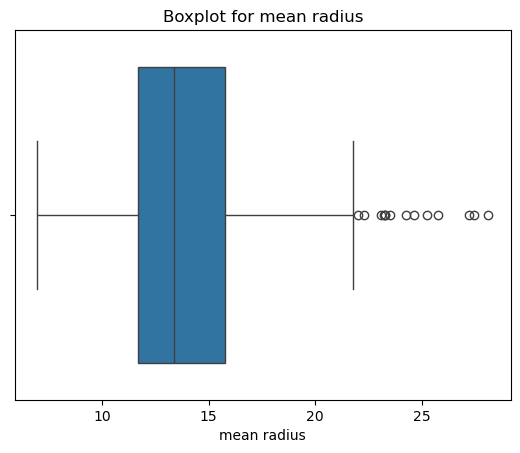

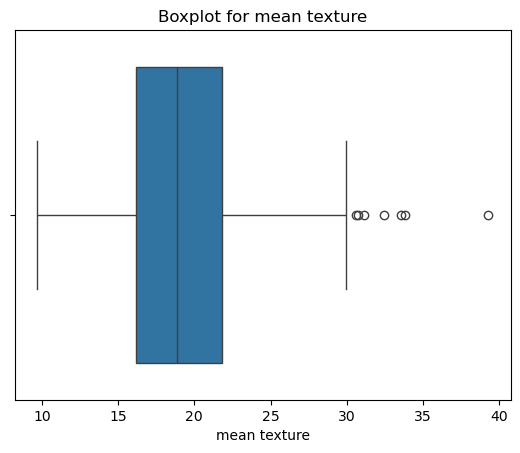

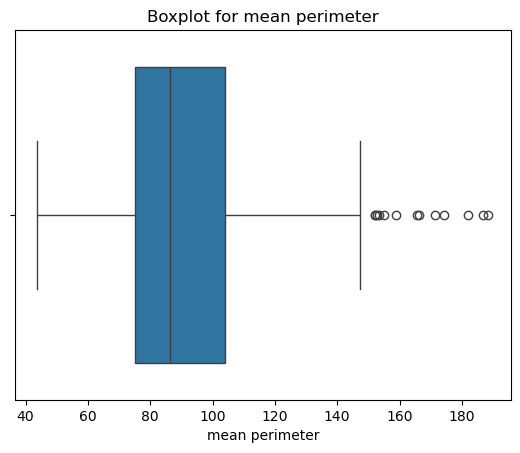

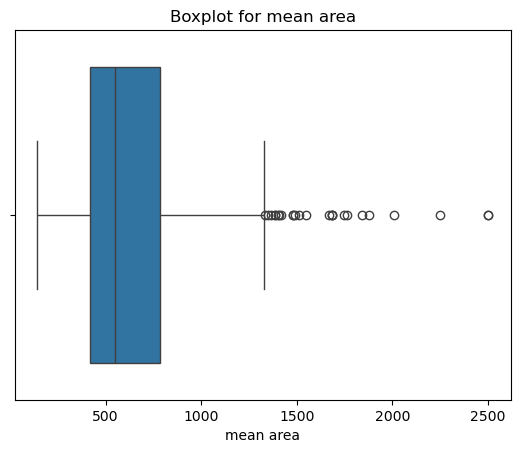

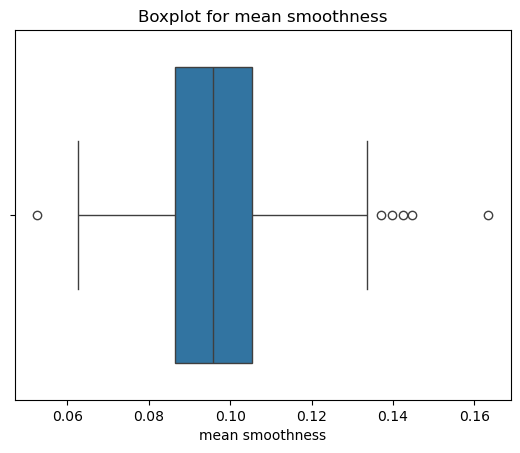

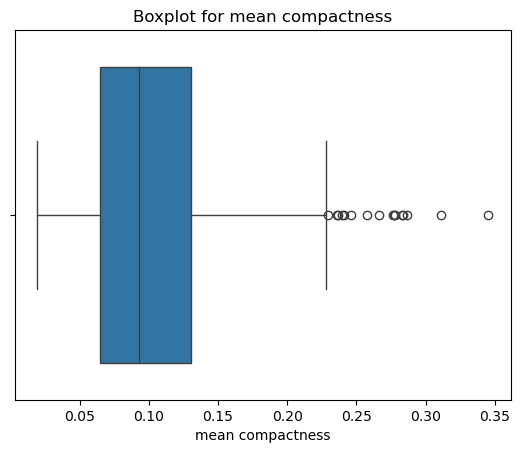

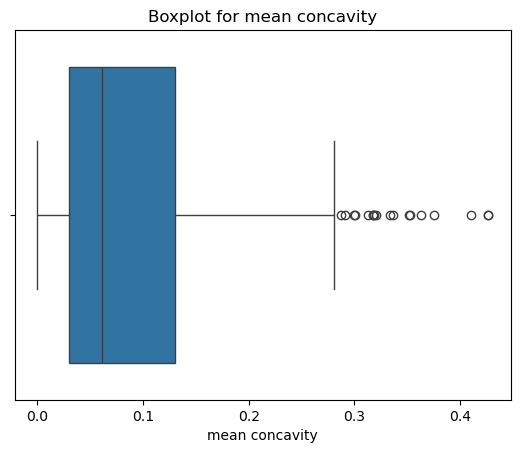

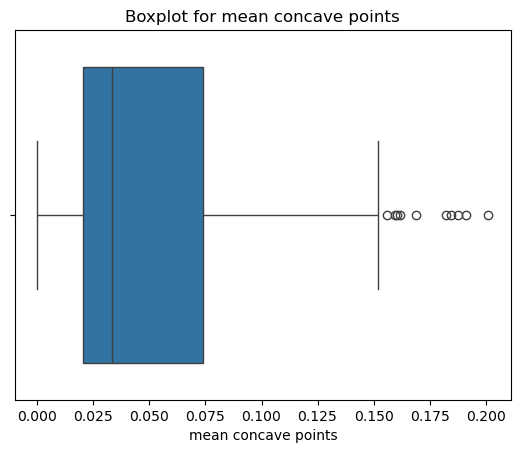

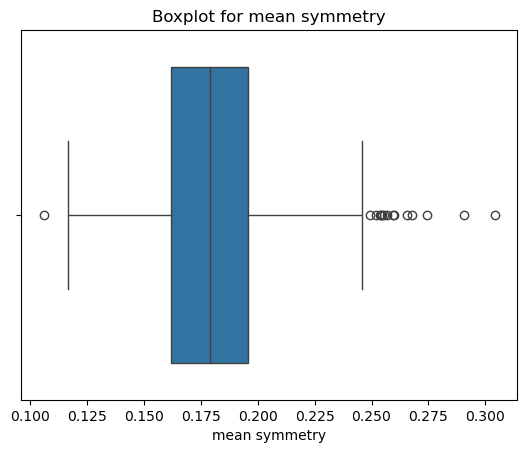

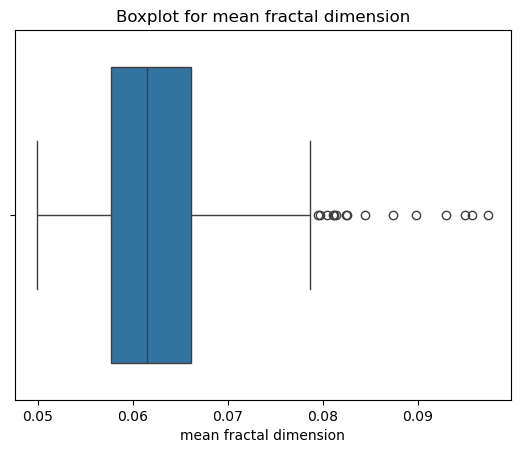

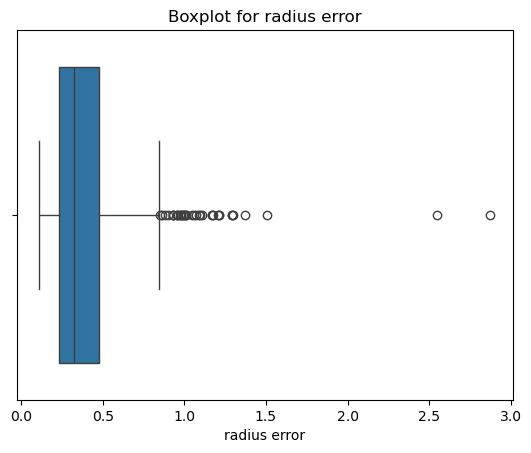

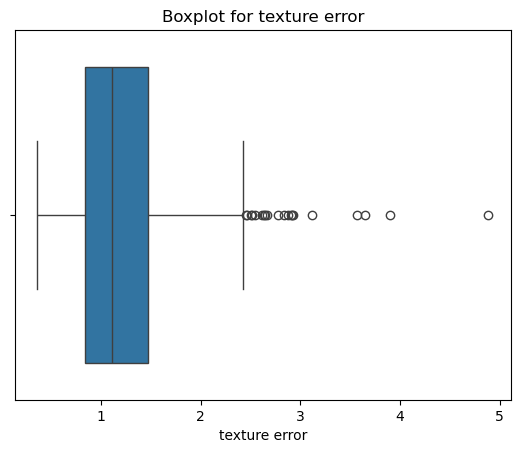

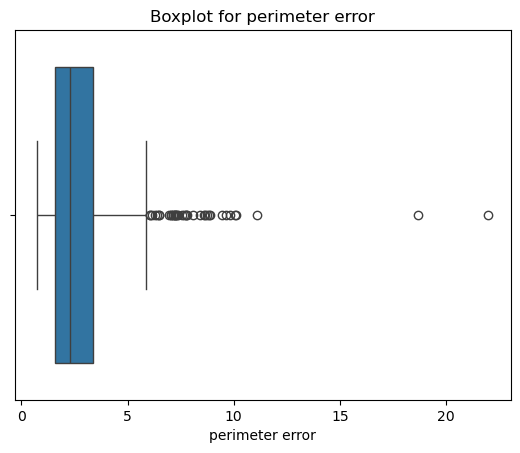

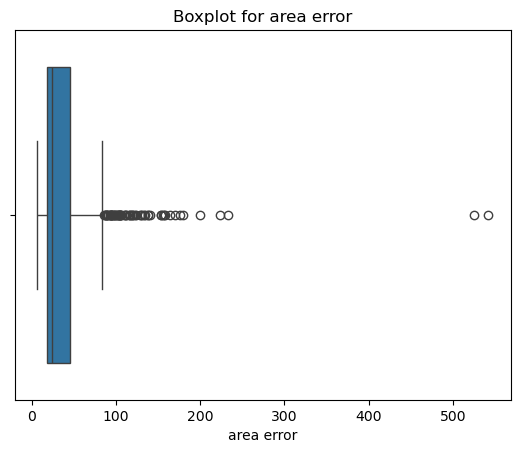

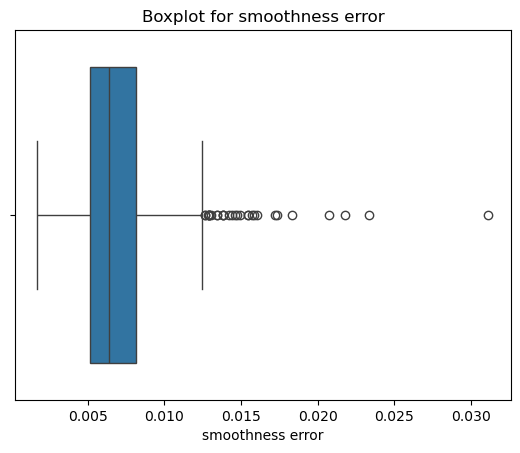

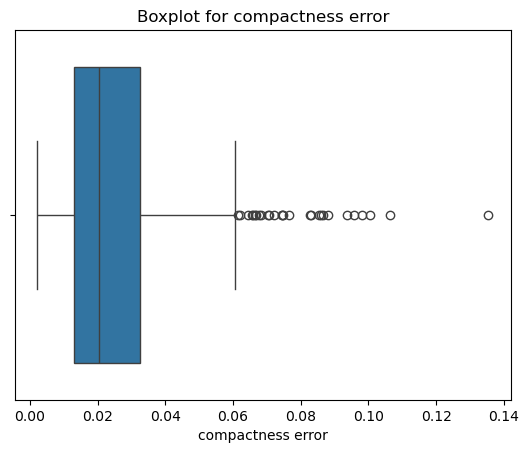

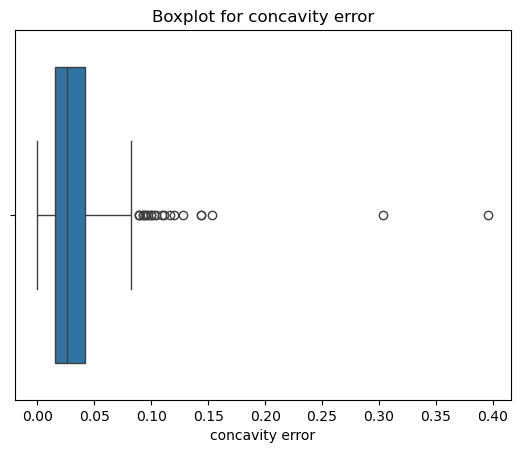

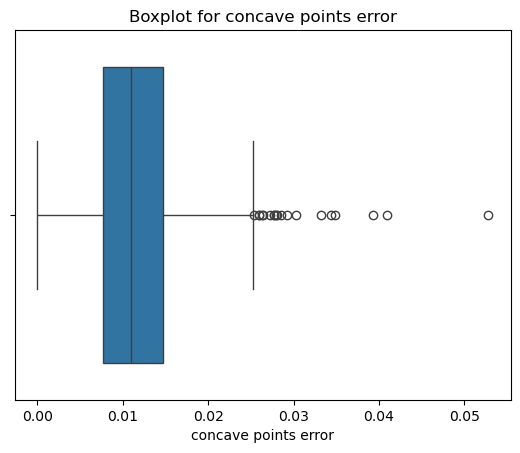

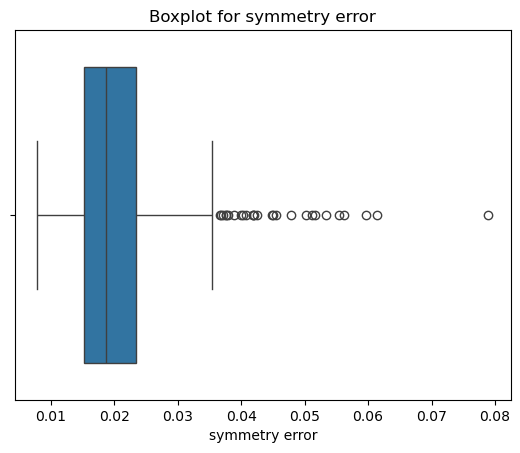

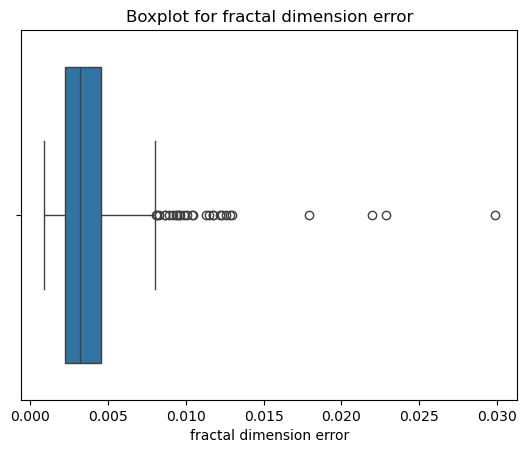

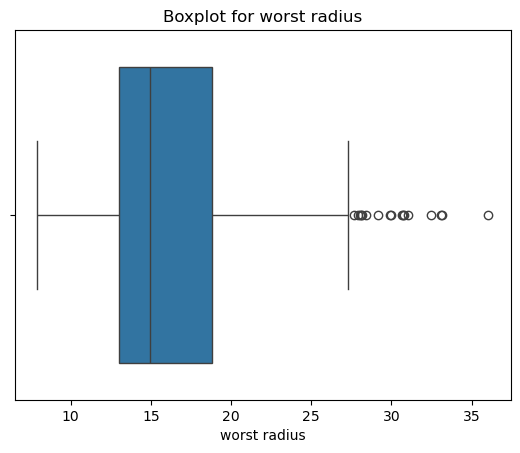

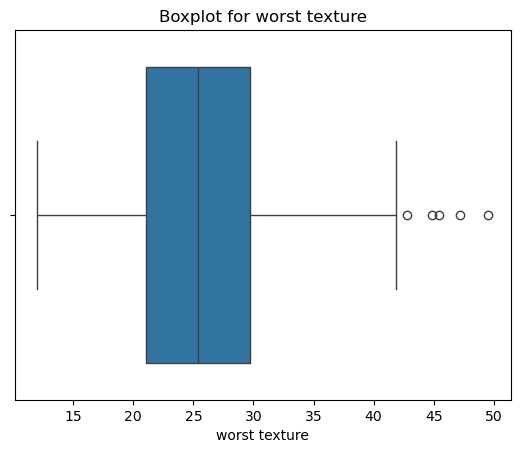

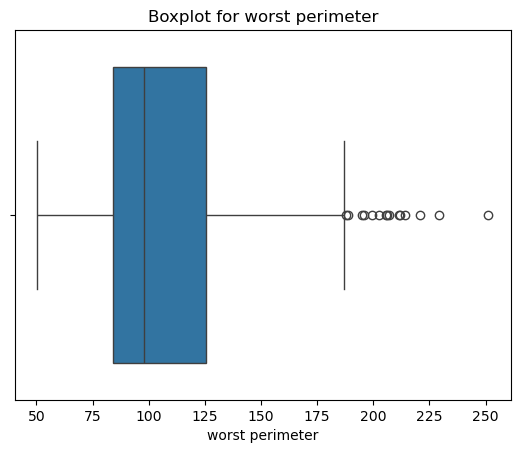

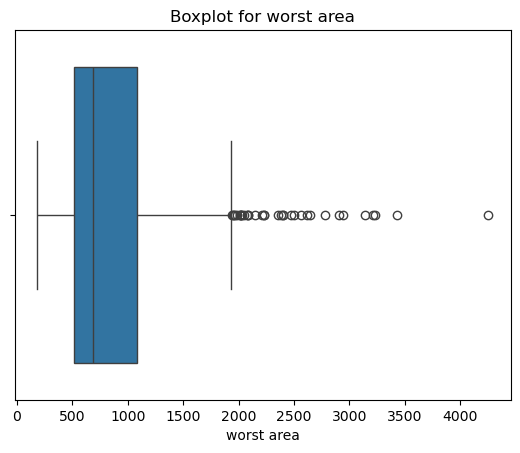

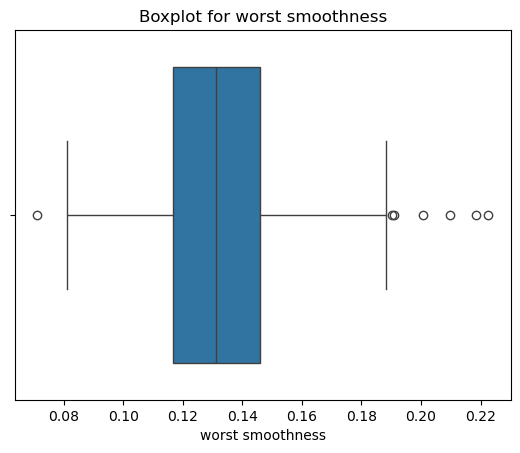

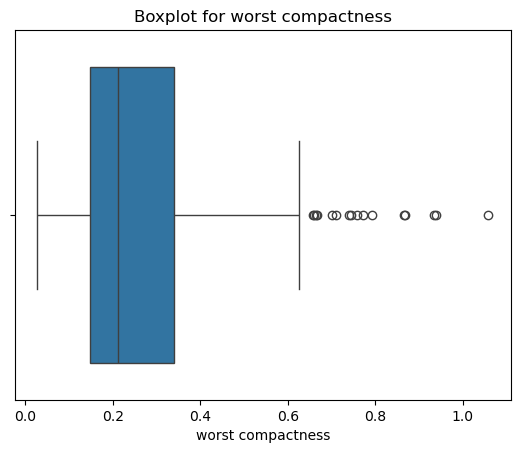

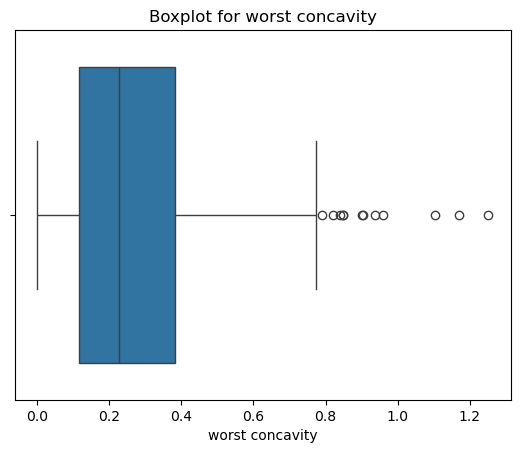

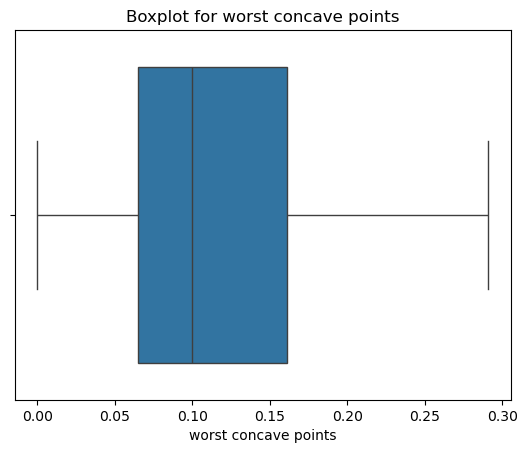

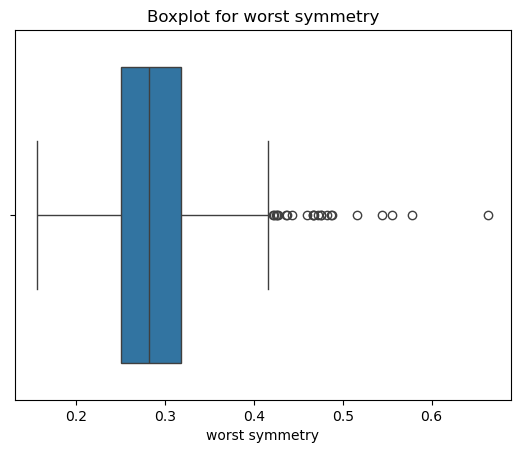

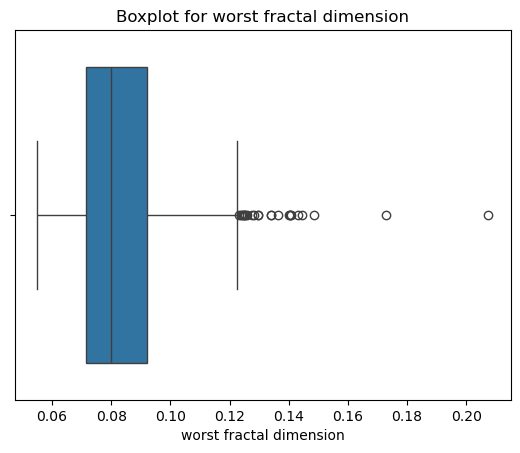

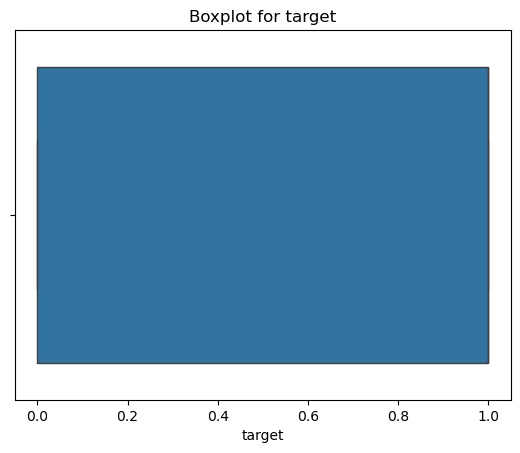

In [149]:
# Filtering only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Looping through numeric columns to create boxplots
for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")  # Add title
    plt.show()

In [155]:
columns_to_process = [col for col in df.columns if col != 'target']  # Exclude 'target'

# Fix outliers using the IQR method
for col in columns_to_process:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,0
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,0
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,0
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301,0
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,0


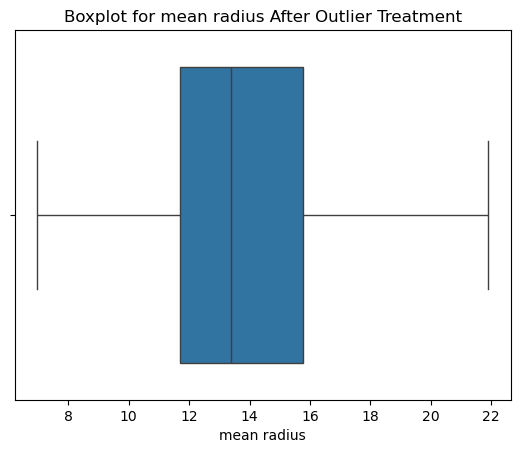

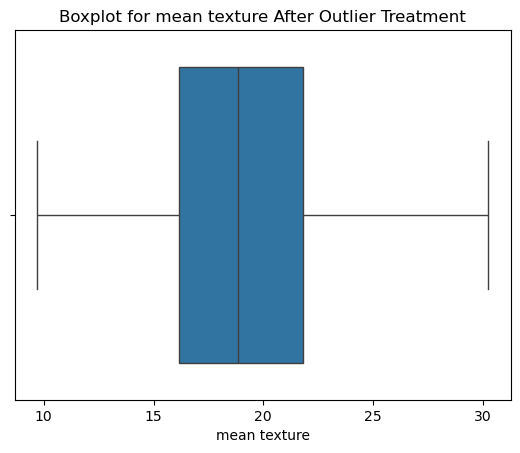

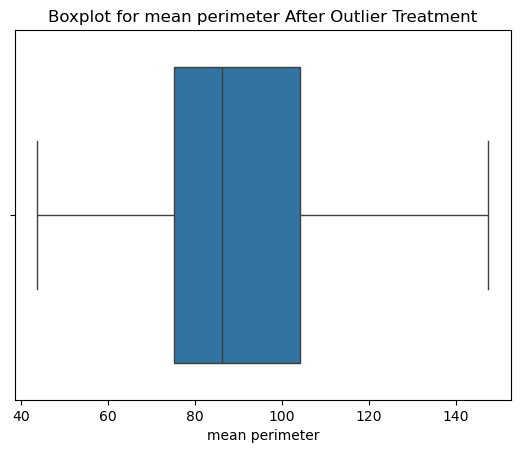

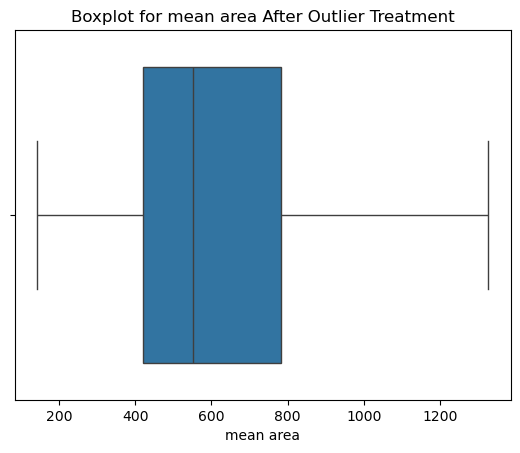

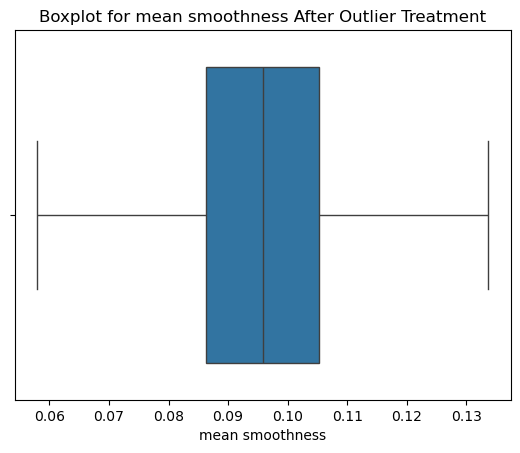

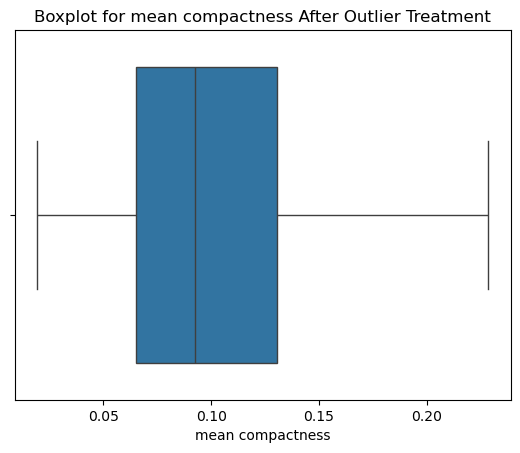

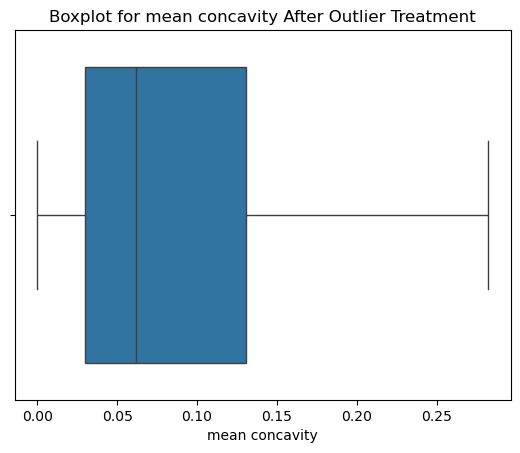

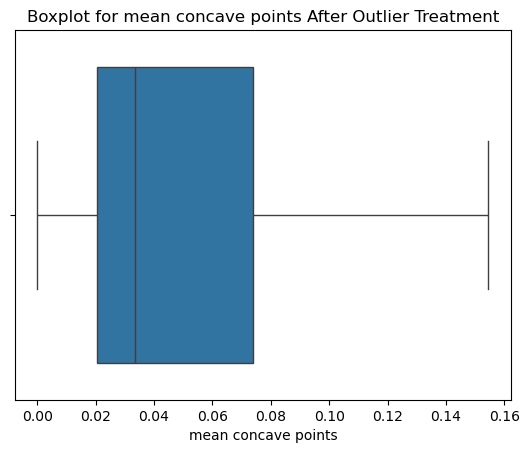

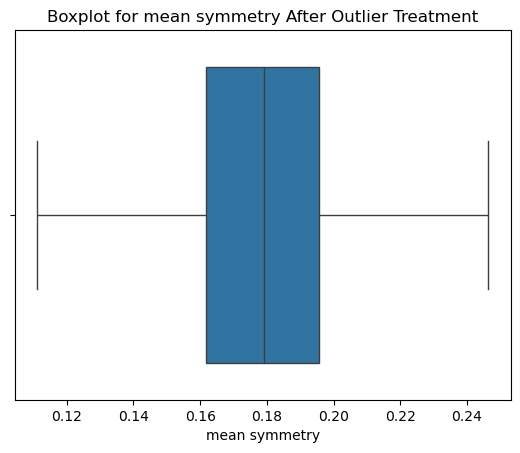

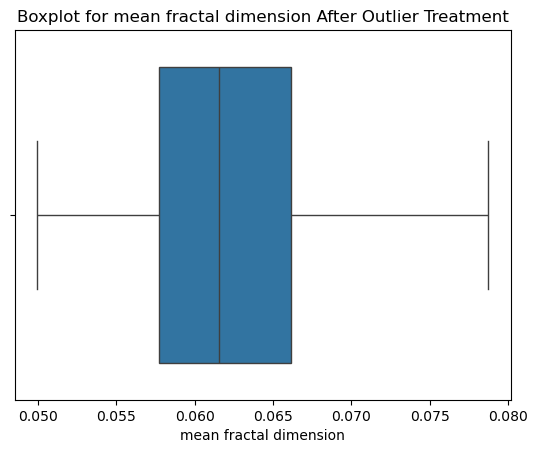

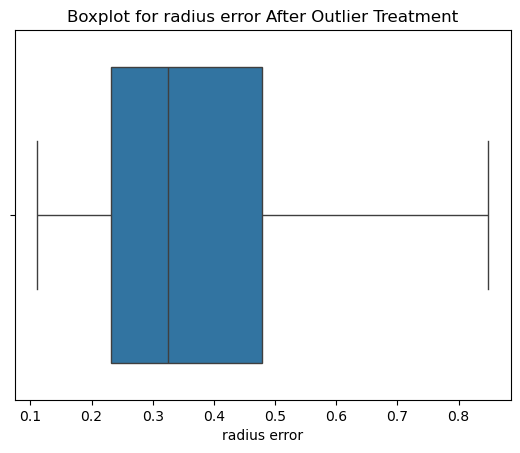

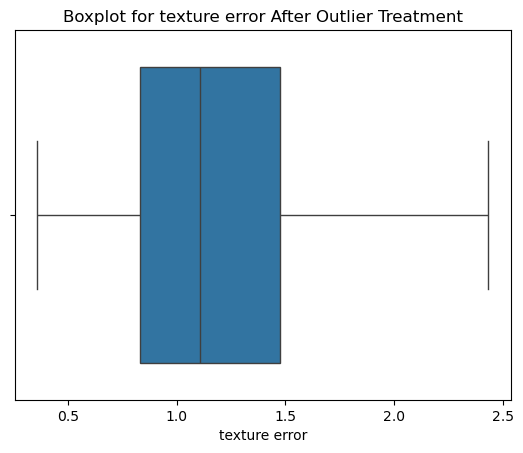

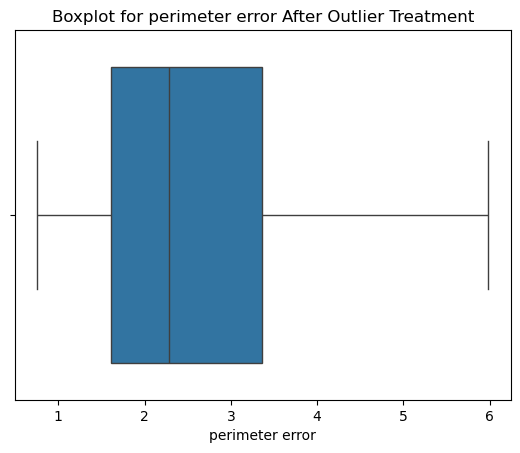

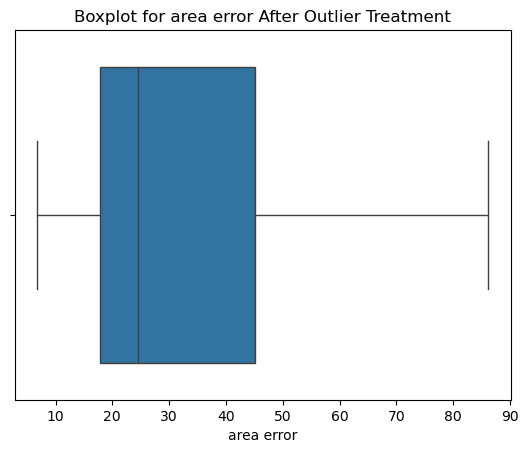

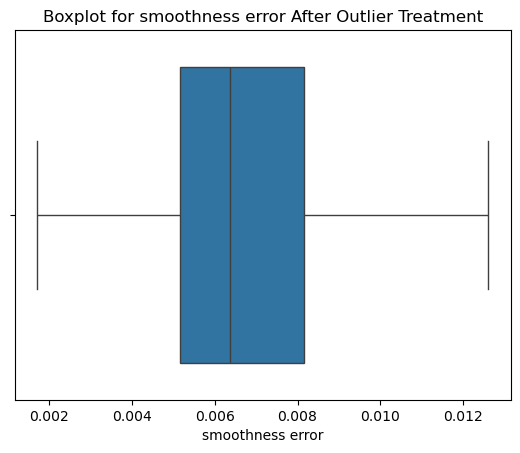

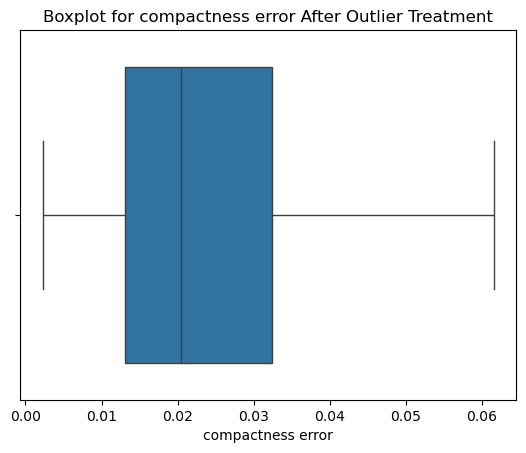

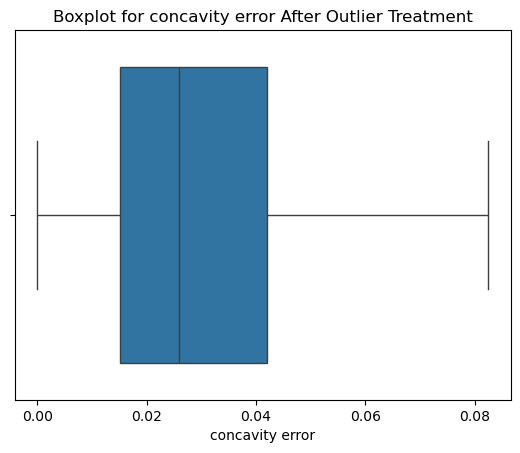

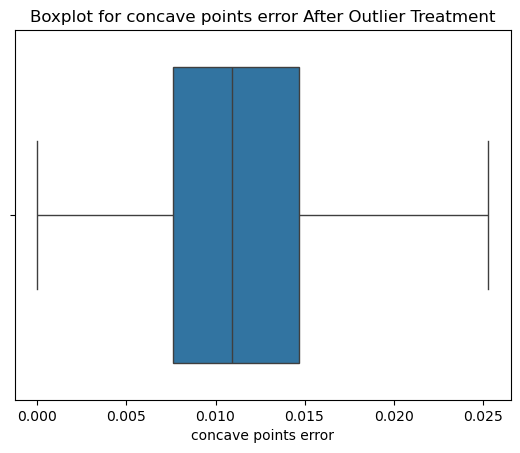

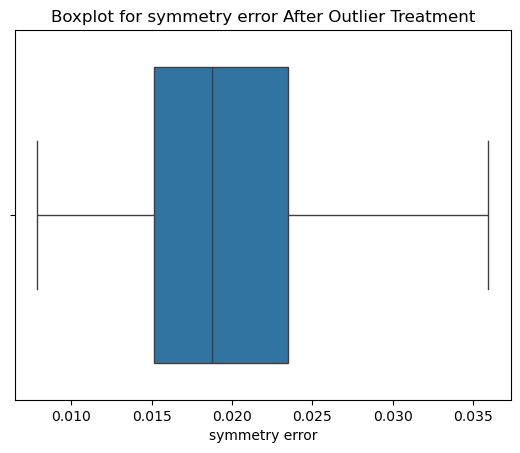

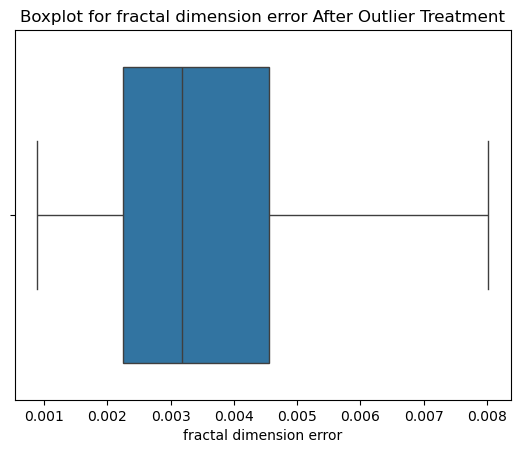

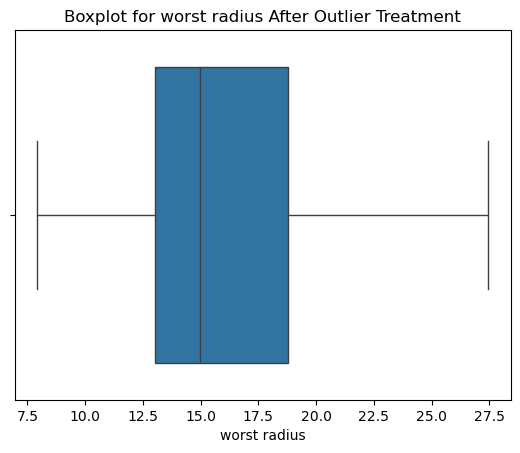

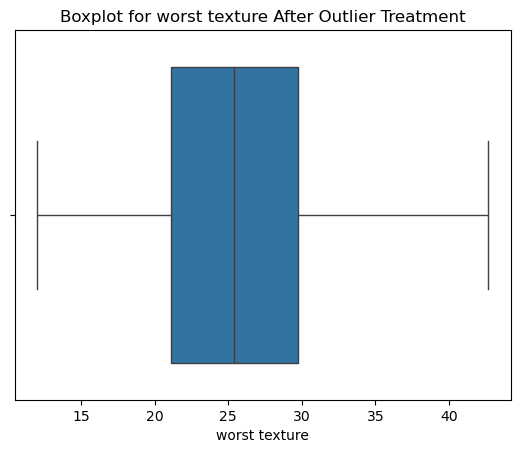

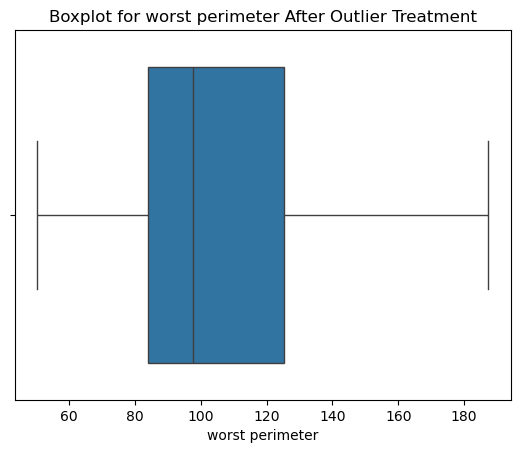

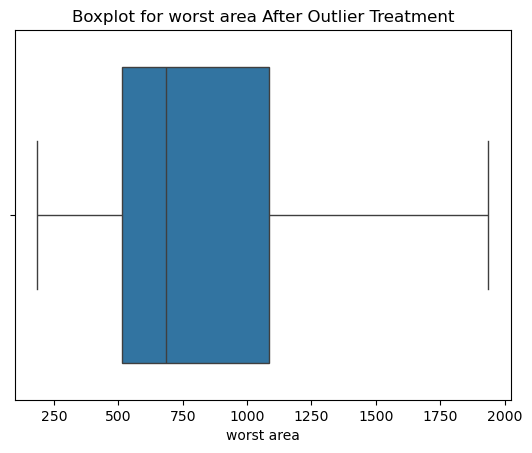

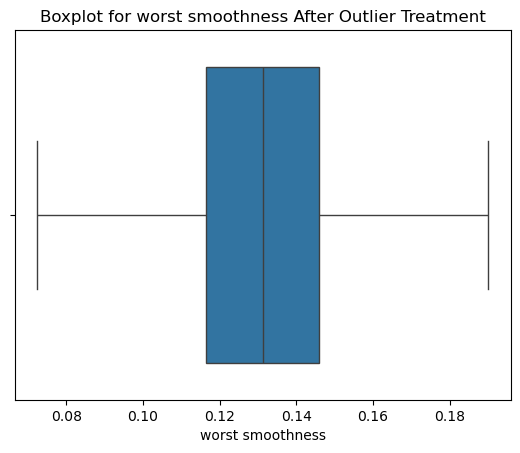

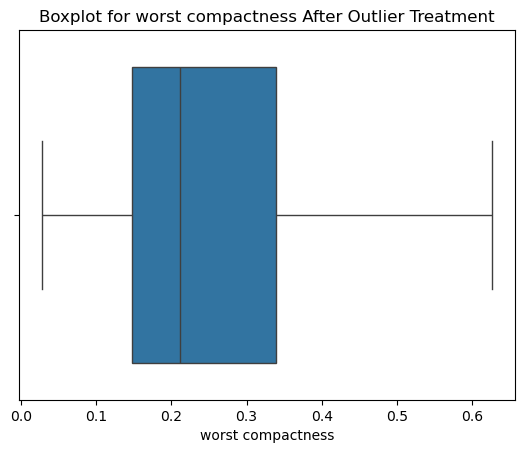

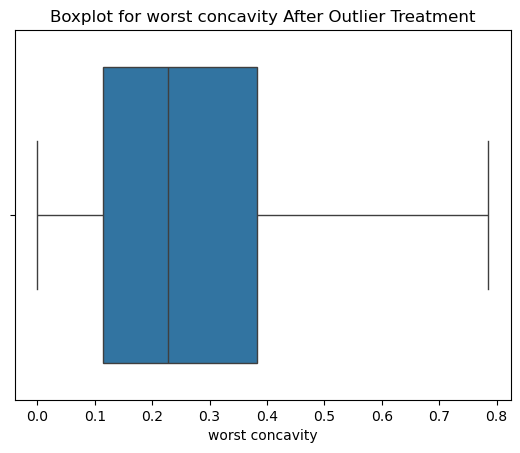

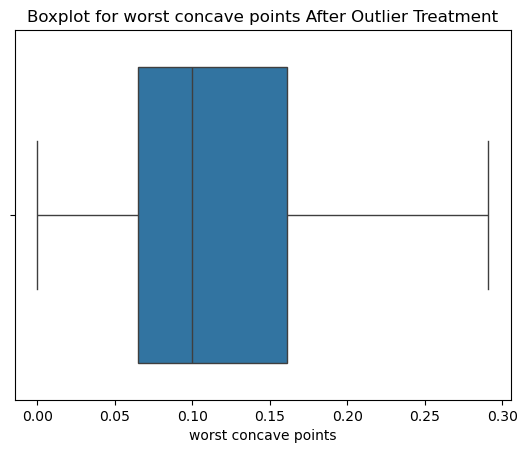

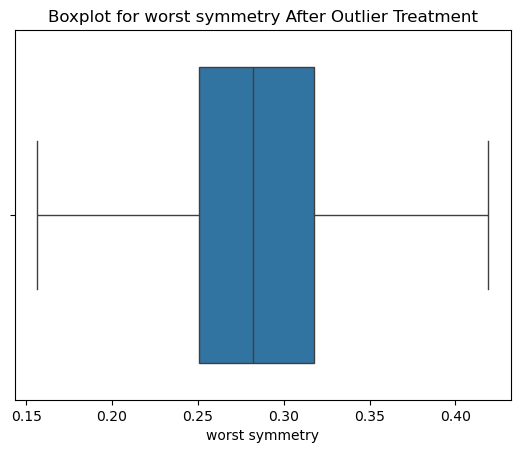

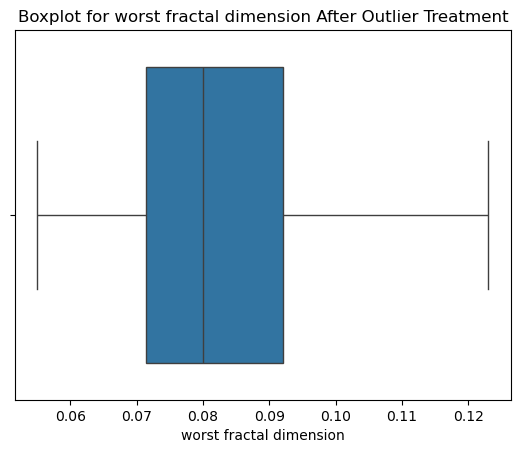

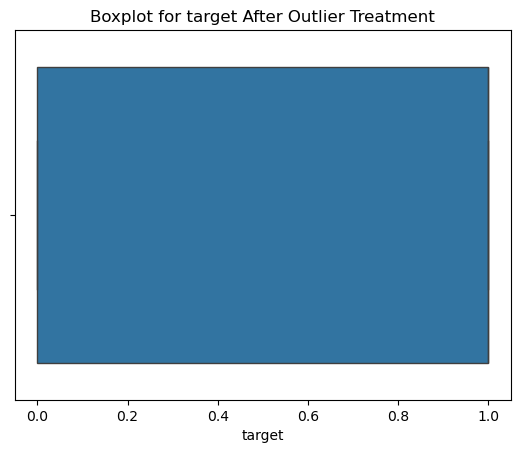

In [157]:
# Box plot for each column after outlier treatment
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col} After Outlier Treatment")
    plt.show()

In [159]:
df1 = df.copy()

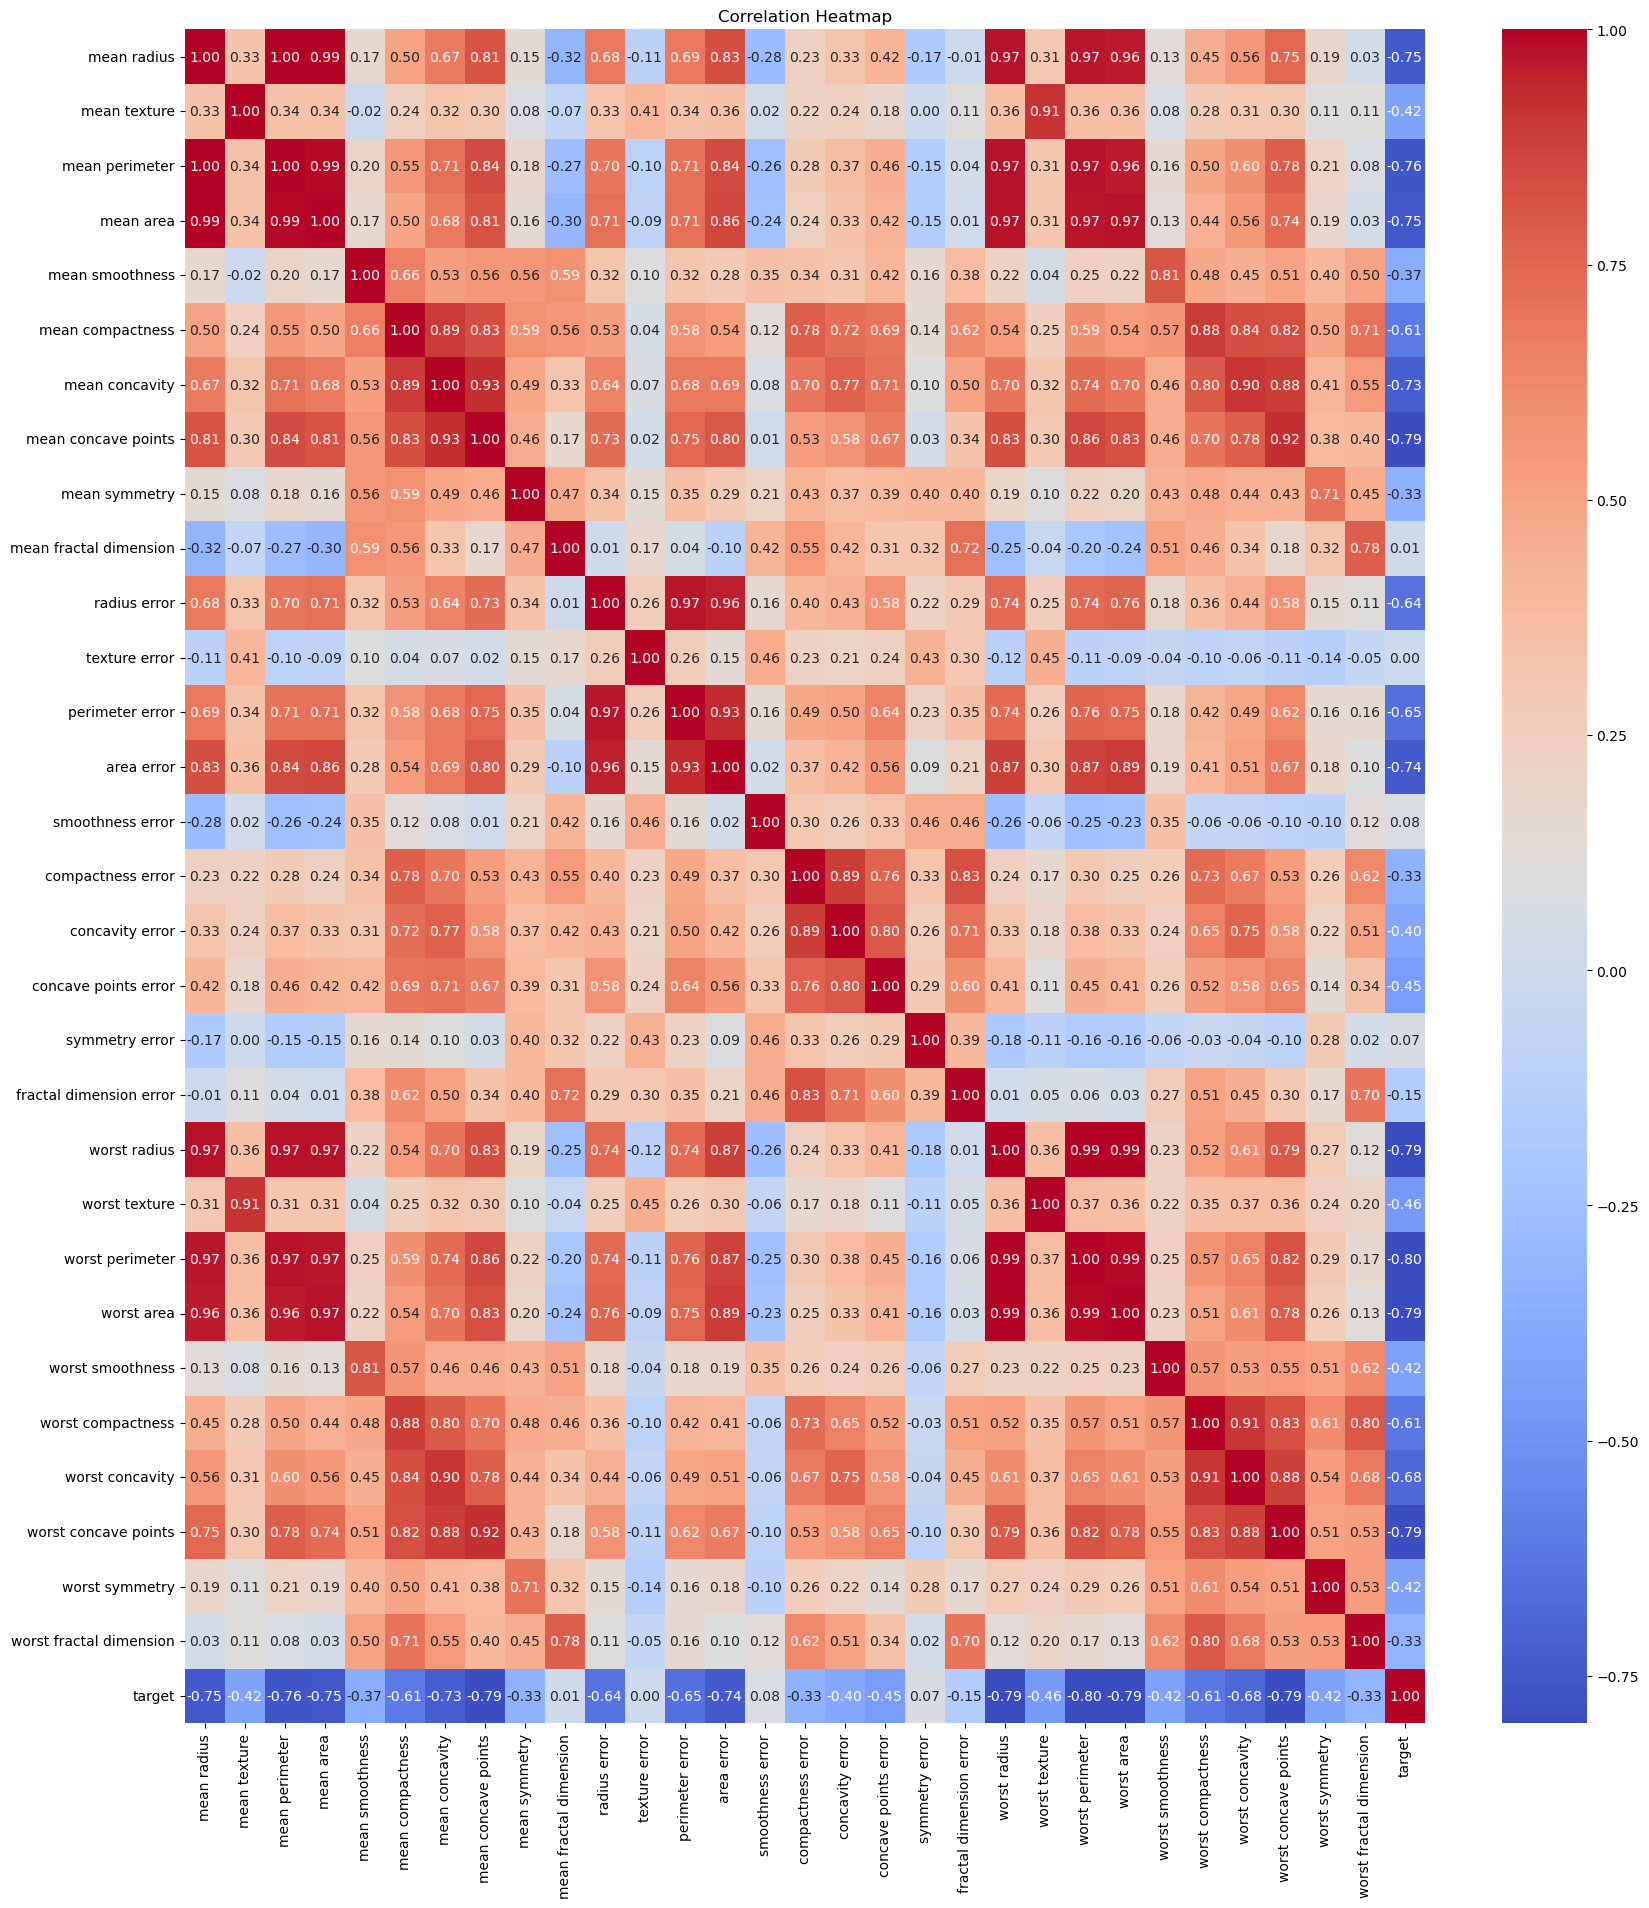

In [161]:
corr_matrix = df1.corr()

# Heatmap
plt.figure(figsize=(20, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [163]:
y = df1['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [167]:
X= df1.drop(['target'], axis=1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [181]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler= StandardScaler()
#Applying different scaling methods
X_standardized= standard_scaler.fit_transform(X_var)

#Converting to DataFrame
X_standardized= pd.DataFrame(X_standardized)

X_standardized


,0,1,2
0,2.296076,2.750622,-1.297676
1,1.087084,-0.243890,-1.297676
2,1.955000,1.152255,-1.297676
3,2.175786,6.046041,-1.297676
4,0.729259,-0.868353,-1.297676
...,...,...,...
564,1.629151,-1.360158,-1.297676
565,0.733827,-0.531855,-1.297676
566,0.414069,-1.104549,-1.297676
567,2.289985,1.919083,-1.297676


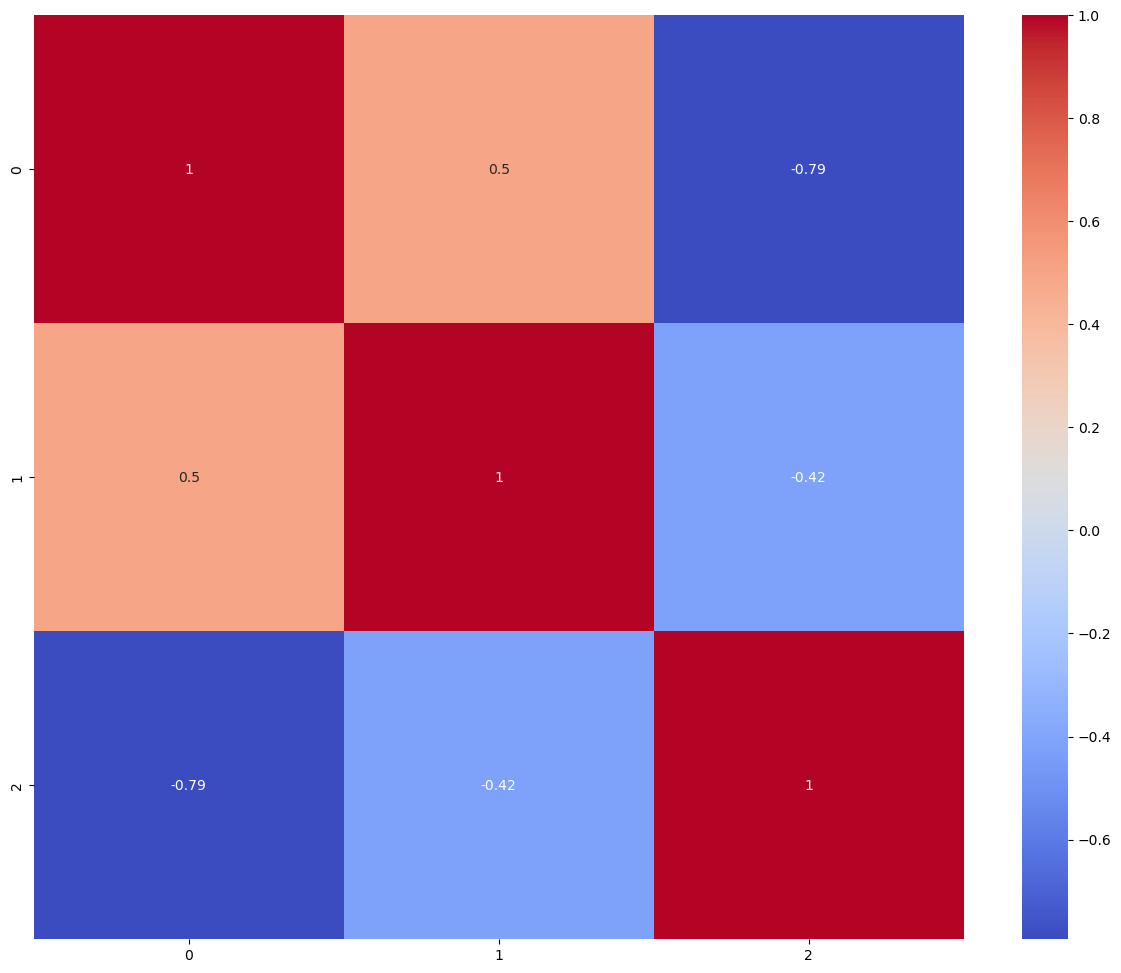

In [185]:
correlation = X_standardized.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [187]:
X_train, X_test, y_train, y_test= train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [ ]:
##Processing Data

In [189]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [191]:
dt_model= DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [193]:
y_pred = dt_model.predict(X_test_scaled)

In [195]:
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [89]:
cr=classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr )


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [91]:
cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)

Confusion Matrix:  [[114]]


C:\Users\Anirudh Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


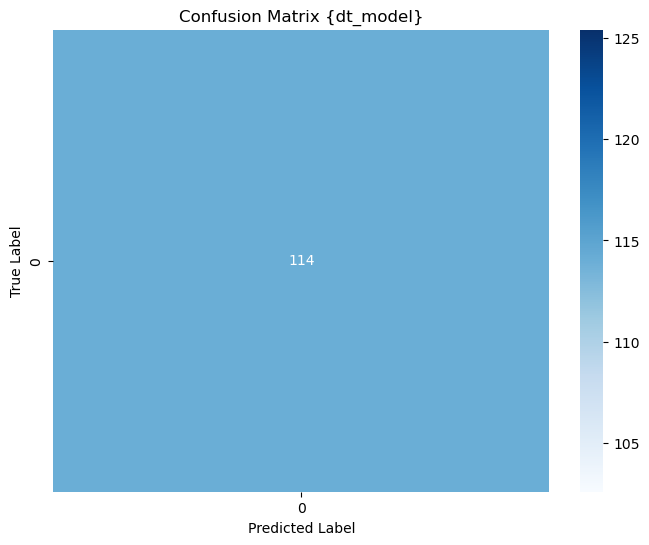

In [93]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.title("Confusion Matrix {dt_model}")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred1=knn_model.predict(X_test)

In [101]:
knn_accuracy= accuracy_score(y_test, y_pred1)
knn_accuracy

1.0

In [103]:
class_report= classification_report(y_test,y_pred1)

C:\Users\Anirudh Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


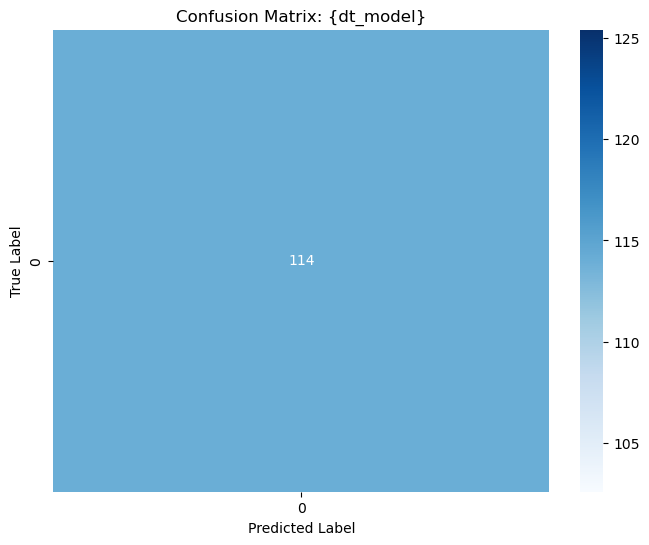

In [109]:
cm2= confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot= True, fmt= 'd', cmap='Blues')
plt.title("Confusion Matrix: {dt_model}")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
## Random Forest Classifier

In [111]:
rf_model= RandomForestClassifier(n_estimators=100,
                                max_depth=10, random_state=42)


In [113]:
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [115]:
rf_pred= rf_model.predict(X_test_scaled)

In [117]:
rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [119]:
accuracy= accuracy_score(y_test, rf_pred)
accuracy

1.0

In [ ]:
## classification report

In [121]:
cf= classification_report(y_test, rf_pred)
print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [ ]:
##Gradient Boosting Classifier

In [203]:
gb_model =GradientBoostingClassifier(n_estimators= 100, 
                                    learning_rate=0.1, max_depth=3, random_state= 42)

In [201]:
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [205]:
gb_pred= rf_model.predict(X_test_scaled)
gb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [207]:
accurcy_gb= accuracy_score(y_test, gb_pred)
accurcy_gb

0.37719298245614036

In [ ]:
##

In [209]:
cf_gb= classification_report(y_test, gb_pred)
print("Gradient Boosting Classification Report")
print(classification_report(y_test, gb_pred))

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       0.00      0.00      0.00        71

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114



C:\Users\Anirudh Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anirudh Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anirudh Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anirudh